# Reinforcement Learning based Virtual Screening
Protein-Ligan pose prediction using RL

## Spatial block arrangement using RL CNN-DQN
__Input__
- Sandbox with block and the surface placemnt

__Output__
- <x, y, $\theta$> for block wrt Sandbox

In [1]:
from block import Block
from matplotlib import pyplot as plt
import numpy as np

### Generating the sandbox
The block world generates a block and places it in the surface by randomizing <x, y, $\theta$>. The $\theta$ rotated block is stored in the _block_ property of the Block class.

Both the block and the surface are combined together into a single sandbox image. (More here)

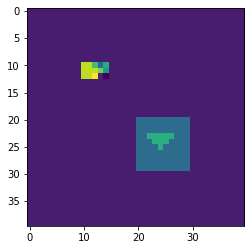

In [10]:
block = Block.get_block()
plt.imshow(block.sandbox)
plt.show()

In [3]:
print(block._rotate_angle, block.shift_x, block.shift_y)

-103 4 2


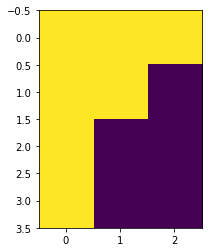

In [4]:
plt.imshow(np.round(block.rotate_block(-block._rotate_angle)))
plt.show()

### Converting sandbox image to tensors for CNN consumption
The sandbox image needs to be converted into an image consumable by the CNN

In [5]:
input_shape = (*block.sandbox.shape, 1)
input_shape

(40, 40, 1)

In [6]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Convolution2D, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

Using TensorFlow backend.
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

### Creating the model
The model is a 4 layer 2D convolution network with 3 Dense layers.

The last layer of the NN outputs a linear output, which would help in the multi-output, continous problem.

In [7]:
def create_model(input_shape, output_count):
    model = Sequential()

    model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(output_count, activation='linear'))

    model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

    return model

### Pose Selection
The get_pose returns the <x, y, $/theta$> from the neural network.

In [8]:
def get_pose(block, input_shape, model):
    state = np.expand_dims(block.sandbox.reshape(input_shape), axis=0)
    pose = model.predict(state).flatten()
    # correct pose maybe?
    return pose

In [11]:
model = create_model(input_shape, 3)
get_pose(block, input_shape, model)

/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(40, 40, 1..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(40, 40, 1..., activation="relu", padding="same")`
  """
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", paddin

array([-0.00955585,  0.0090885 ,  0.01227864], dtype=float32)

In [63]:
np.ones((10, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [68]:
x = np.random.randint(1, 10, (3, 3))
x

array([[2, 7, 6],
       [6, 8, 1],
       [7, 1, 3]])

In [69]:
x.reshape(1, 3, 3)

array([[[2, 7, 6],
        [6, 8, 1],
        [7, 1, 3]]])

In [70]:
x.reshape(3, 3, 1)

array([[[2],
        [7],
        [6]],

       [[6],
        [8],
        [1]],

       [[7],
        [1],
        [3]]])